In [ ]:
#The SMS Spam Collection is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged acording being ham (legitimate) or spam.
#The files contain one message per line. Each line is composed by two columns: v1 contains the label (ham or spam) and v2 contains the raw text.

In [19]:
import pandas as pd #data manipulation
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [20]:
#loading data set
spam_df = pd.read_csv("emails.csv")

In [21]:
spam_df.head(10)

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
5,"Subject: great nnews hello , welcome to medzo...",1
6,Subject: here ' s a hot play in motion homela...,1
7,Subject: save your money buy getting this thin...,1
8,Subject: undeliverable : home based business f...,1
9,Subject: save your money buy getting this thin...,1


In [22]:
spam_df.tail(5)

,text,spam
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0
5727,Subject: news : aurora 5 . 2 update aurora ve...,0


In [23]:
spam_df.head(5)

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [24]:
spam_df.describe()

,spam
count,5728.000000
mean,0.238827
std,0.426404
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [25]:
spam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [26]:
#visualizing the data. i will divide in 2 categoriez. 0 and 1
ham = spam_df[spam_df['spam']==0]


In [27]:
ham

,text,spam
1368,"Subject: hello guys , i ' m "" bugging you "" f...",0
1369,Subject: sacramento weather station fyi - - ...,0
1370,Subject: from the enron india newsdesk - jan 1...,0
1371,Subject: re : powerisk 2001 - your invitation ...,0
1372,Subject: re : resco database and customer capt...,0
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [28]:
spam = spam_df[spam_df['spam']==1]

In [29]:
spam

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
1363,Subject: are you ready to get it ? hello ! v...,1
1364,Subject: would you like a $ 250 gas card ? do...,1
1365,"Subject: immediate reply needed dear sir , i...",1
1366,Subject: wanna see me get fisted ? fist bang...,1


In [34]:
print( 'Spam percentage =', (len(spam) / len(spam_df) )*100,"%")

Spam percentage = 23.88268156424581 %


In [35]:
print( 'Ham percentage =', (len(ham) / len(spam_df) )*100,"%")

Ham percentage = 76.11731843575419 %


In [51]:
from sklearn.feature_extraction.text import CountVectorizer

sample_data = ['This is the first document.', 'This document is the second document.', 'Is this the first document?']
sample_vectorizer = CountVectorizer()
X = sample_vectorizer.fit_transform(sample_data)
print(X.toarray())
print(sample_vectorizer.get_feature_names_out())


[[1 1 1 0 1 1]
 [2 0 1 1 1 1]
 [1 1 1 0 1 1]]
['document' 'first' 'is' 'second' 'the' 'this']


In [52]:

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
spamham_countvectorizer = vectorizer.fit_transform(spam_df['text'])

In [56]:
print(vectorizer.get_feature_names_out())

['00' '000' '0000' ... 'zzn' 'zzncacst' 'zzzz']


In [57]:
print(spamham_countvectorizer.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [4 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [58]:
spamham_countvectorizer.shape

(5728, 37303)

In [59]:
label = spam_df['spam'].values

In [60]:
label

array([1, 1, 1, ..., 0, 0, 0])

In [61]:
#training model


from sklearn.naive_bayes import MultinomialNB
NB_classifier = MultinomialNB()
NB_classifier.fit(spamham_countvectorizer,label)


MultinomialNB()

In [62]:
testing_sample=['Free money!!!', 'Hi Kim, Please let me know if you need any further information. Thanks' ]
testing_sample_countvectorizer = vectorizer.transform(testing_sample)

In [63]:
test_predict = NB_classifier.predict(testing_sample_countvectorizer)
test_predict

array([1, 0])

In [64]:
# Mini Challenge
testing_sample = ['Hello, I am Ryan, I would like to book a hotel in Bali by January 24th', 'money viagara!!!!!']

In [65]:
testing_sample = ['money viagara!!!!!', "Hello, I am Ryan, I would like to book a hotel in SF by January 24th"]
testing_sample_countvectorizer = vectorizer.transform(testing_sample)
test_predict = NB_classifier.predict(testing_sample_countvectorizer)
test_predict

array([1, 0])

In [66]:
X = spamham_countvectorizer
y= label

In [67]:
X.shape
y.shape

(5728,)

In [68]:
X.shape

(5728, 37303)

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [72]:
from sklearn.naive_bayes import MultinomialNB
NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB()

In [73]:
#testing
from sklearn.metrics import classification_report, confusion_matrix

In [74]:
y_predict_train = NB_classifier.predict(X_train)
y_predict_train

array([0, 0, 0, ..., 0, 0, 0])

<Axes: >

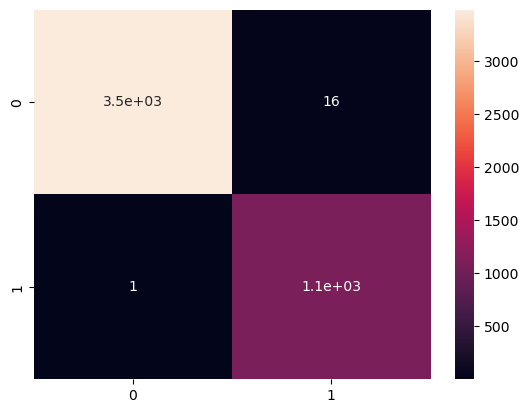

In [75]:
cm = confusion_matrix(y_train,y_predict_train)
sns.heatmap(cm,annot=True)

<Axes: >

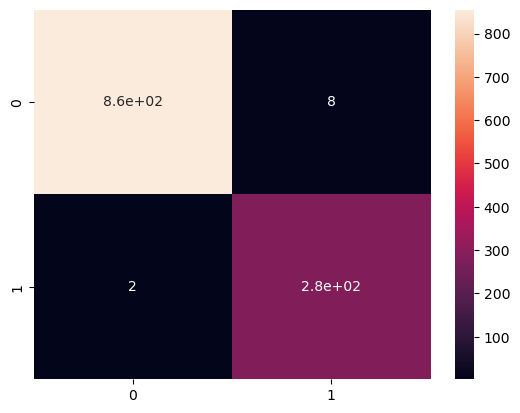

In [76]:
y_predict_test=NB_classifier.predict(X_test)
cm=confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm,annot=True)

In [77]:
print(classification_report(y_test,y_predict_test))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       863
           1       0.97      0.99      0.98       283

    accuracy                           0.99      1146
   macro avg       0.98      0.99      0.99      1146
weighted avg       0.99      0.99      0.99      1146

